In [1]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
from skimage.io import imread

In [11]:
checkpoint = '/Users/cjw/Data/sez/sez_checkpoints/2019-02-04-zero-mean/unet_checkpoint-5000'
cpmeta = checkpoint + '.meta'

In [12]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())
saver = tf.train.import_meta_graph(cpmeta)
saver.restore(sess, checkpoint)

INFO:tensorflow:Restoring parameters from /Users/cjw/Data/sez/sez_checkpoints/2019-02-04-zero-mean/unet_checkpoint-5000


In [4]:
g = tf.get_default_graph()
ops = g.get_operations()
for op in ops:
    try:
        print(op.name, op.outputs, len(op.outputs))
    except:
        print(op.name, "no output")
    print('------')

init [] 0
------
Placeholder [<tf.Tensor 'Placeholder:0' shape=(?, 256, 256, 3) dtype=float32>] 1
------
Placeholder_1 [<tf.Tensor 'Placeholder_1:0' shape=(?, 256, 256, 5) dtype=float32>] 1
------
Placeholder_2 [<tf.Tensor 'Placeholder_2:0' shape=() dtype=float32>] 1
------
encoder-layer-16-0/kernel/Initializer/random_uniform/shape [<tf.Tensor 'encoder-layer-16-0/kernel/Initializer/random_uniform/shape:0' shape=(4,) dtype=int32>] 1
------
encoder-layer-16-0/kernel/Initializer/random_uniform/min [<tf.Tensor 'encoder-layer-16-0/kernel/Initializer/random_uniform/min:0' shape=() dtype=float32>] 1
------
encoder-layer-16-0/kernel/Initializer/random_uniform/max [<tf.Tensor 'encoder-layer-16-0/kernel/Initializer/random_uniform/max:0' shape=() dtype=float32>] 1
------
encoder-layer-16-0/kernel/Initializer/random_uniform/RandomUniform [<tf.Tensor 'encoder-layer-16-0/kernel/Initializer/random_uniform/RandomUniform:0' shape=(5, 5, 3, 16) dtype=float32>] 1
------
encoder-layer-16-0/kernel/Initiali

decoder-conv-16-1/BatchToSpaceND/block_shape [<tf.Tensor 'decoder-conv-16-1/BatchToSpaceND/block_shape:0' shape=(2,) dtype=int32>] 1
------
decoder-conv-16-1/BatchToSpaceND/crops [<tf.Tensor 'decoder-conv-16-1/BatchToSpaceND/crops:0' shape=(2, 2) dtype=int32>] 1
------
decoder-conv-16-1/BatchToSpaceND [<tf.Tensor 'decoder-conv-16-1/BatchToSpaceND:0' shape=(?, 128, 128, 16) dtype=float32>] 1
------
decoder-conv-16-1/BiasAdd [<tf.Tensor 'decoder-conv-16-1/BiasAdd:0' shape=(?, 128, 128, 16) dtype=float32>] 1
------
decoder-conv-16-2/kernel/Initializer/random_uniform/shape [<tf.Tensor 'decoder-conv-16-2/kernel/Initializer/random_uniform/shape:0' shape=(4,) dtype=int32>] 1
------
decoder-conv-16-2/kernel/Initializer/random_uniform/min [<tf.Tensor 'decoder-conv-16-2/kernel/Initializer/random_uniform/min:0' shape=() dtype=float32>] 1
------
decoder-conv-16-2/kernel/Initializer/random_uniform/max [<tf.Tensor 'decoder-conv-16-2/kernel/Initializer/random_uniform/max:0' shape=() dtype=float32>] 1

gradients/encoder-layer-128-0/BiasAdd_grad/tuple/control_dependency [<tf.Tensor 'gradients/encoder-layer-128-0/BiasAdd_grad/tuple/control_dependency:0' shape=(?, 16, 16, 128) dtype=float32>] 1
------
gradients/encoder-layer-128-0/BiasAdd_grad/tuple/control_dependency_1 [<tf.Tensor 'gradients/encoder-layer-128-0/BiasAdd_grad/tuple/control_dependency_1:0' shape=(128,) dtype=float32>] 1
------
gradients/encoder-layer-128-0/Conv2D_grad/ShapeN [<tf.Tensor 'gradients/encoder-layer-128-0/Conv2D_grad/ShapeN:0' shape=(4,) dtype=int32>, <tf.Tensor 'gradients/encoder-layer-128-0/Conv2D_grad/ShapeN:1' shape=(4,) dtype=int32>] 2
------
gradients/encoder-layer-128-0/Conv2D_grad/Conv2DBackpropInput [<tf.Tensor 'gradients/encoder-layer-128-0/Conv2D_grad/Conv2DBackpropInput:0' shape=(?, 32, 32, 64) dtype=float32>] 1
------
gradients/encoder-layer-128-0/Conv2D_grad/Conv2DBackpropFilter [<tf.Tensor 'gradients/encoder-layer-128-0/Conv2D_grad/Conv2DBackpropFilter:0' shape=(3, 3, 64, 128) dtype=float32>] 1


decoder-layer-5/bias/adam_opt_1 [<tf.Tensor 'decoder-layer-5/bias/adam_opt_1:0' shape=(5,) dtype=float32_ref>] 1
------
decoder-layer-5/bias/adam_opt_1/Assign [<tf.Tensor 'decoder-layer-5/bias/adam_opt_1/Assign:0' shape=(5,) dtype=float32_ref>] 1
------
decoder-layer-5/bias/adam_opt_1/read [<tf.Tensor 'decoder-layer-5/bias/adam_opt_1/read:0' shape=(5,) dtype=float32>] 1
------
decoder-conv-5-1/kernel/adam_opt/Initializer/zeros [<tf.Tensor 'decoder-conv-5-1/kernel/adam_opt/Initializer/zeros:0' shape=(3, 3, 8, 5) dtype=float32>] 1
------
decoder-conv-5-1/kernel/adam_opt [<tf.Tensor 'decoder-conv-5-1/kernel/adam_opt:0' shape=(3, 3, 8, 5) dtype=float32_ref>] 1
------
decoder-conv-5-1/kernel/adam_opt/Assign [<tf.Tensor 'decoder-conv-5-1/kernel/adam_opt/Assign:0' shape=(3, 3, 8, 5) dtype=float32_ref>] 1
------
decoder-conv-5-1/kernel/adam_opt/read [<tf.Tensor 'decoder-conv-5-1/kernel/adam_opt/read:0' shape=(3, 3, 8, 5) dtype=float32>] 1
------
decoder-conv-5-1/kernel/adam_opt_1/Initializer/z

In [13]:
decoder = sess.graph.get_tensor_by_name('decoder-softmax:0')
images = sess.graph.get_tensor_by_name('Placeholder:0')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(2044, 2048, 3) (1, 1, 3) (1, 1, 3)


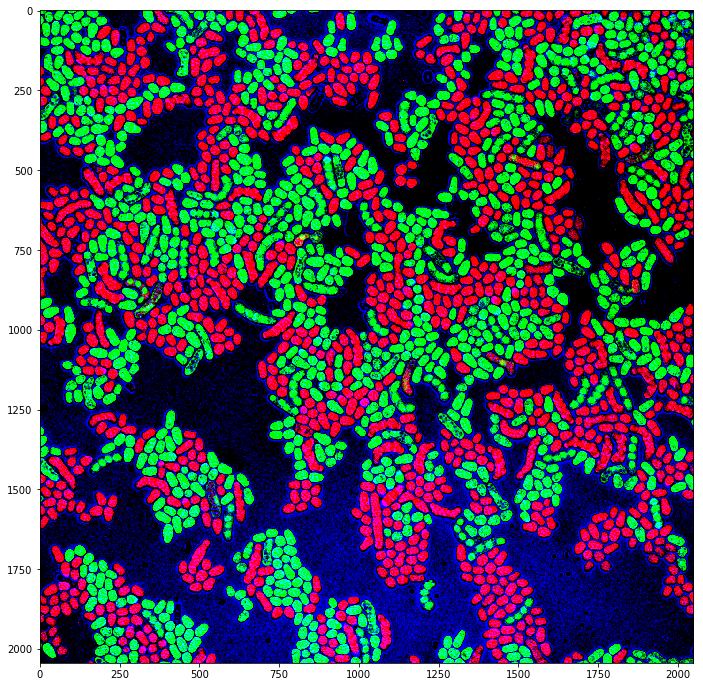

In [21]:
# data_raw = imread('/Users/cjw/Data/sez/RawTifs/10_hours_punched_overnight/NDExp_Point0017_Seq0017.tif')
data_raw = imread('/Users/cjw/Data/sez/RawTifs/16_hours_punched_overnight/NDExp_Point0015_Seq0015.tif')
dmin = data_raw.min(axis=(0,1),keepdims=True)
dmax = data_raw.max(axis=(0,1),keepdims=True)
dmean = data_raw.mean(axis=(0,1),keepdims=True)
dstd = data_raw.std(axis=(0,1),keepdims=True)
data = (data_raw - dmean)/(dstd)

plt.figure(figsize=(12,12))
plt.imshow(data)
print(data_raw.shape, dmin.shape, dmax.shape)

In [22]:
def decode(patches):
    ds = sess.run(decoder, feed_dict={images:patches})
    return ds

        
def image_to_patches(image, w):
    
    ny, nx, nc = image.shape
    
    patch_list = list()
    xmax = 0
    ymax = 0
    xok = True
    yok = True
    while xok:
        yok = True
        ymax = 0
        xs = xmax
        xmax += w
        if xmax >= nx:
            xmax = nx
            xs = nx - w
            xok = False
        while yok:
            ys = ymax
            ymax += w
            if ymax > ny:
                ymax = ny
                ys = ny - w
                yok = False
            #print(ys, ymax, yok, xs, xmax, xok)
            p = np.expand_dims(image[ys:ymax, xs:xmax, :], 0)
            patch_list.append(p)
    
    patches = np.concatenate(patch_list, axis=0)
    print(patches.shape)
    return  patches

def patches_to_image(patches, w, nx, ny):
    
    image = np.zeros((ny, nx, patches.shape[-1]), dtype=patches.dtype)
    xmax = 0
    ymax = 0
    xok = True
    yok = True
    patch_index = 0
    while xok:
        ymax = 0
        yok = True
        xs = xmax
        xmax += w
        if xmax >= nx:
            xmax = nx
            xs = nx - w
            xok = False
        while yok:
            ys = ymax
            ymax += w
            if ymax > ny:
                ymax = ny
                ys = ny - w
                yok = False
            image[ys:ymax, xs:xmax, :] = patches[patch_index]
            patch_index += 1
            #print(patch_index, ys, ymax, xs, xmax, yok, xok)
    return image

In [23]:
import time

t1 = time.time()
p = image_to_patches(data, 256)
d2 = data[128:, 128:, :]
p2 = image_to_patches(d2, 256)
dp = decode(p)
dp2 = decode(p2)
ndp = dp.shape[0]

r1 = patches_to_image(dp, 256, data.shape[1] , data.shape[0])
r2 = patches_to_image(dp2, 256, data.shape[1] - 128, data.shape[0] - 128)

rr2 = r1*0
rr2[128:, 128:, :] = r2

rstack = np.stack((r1, rr2), axis=0)

r = rstack.max(axis=0)

print(time.time()  - t1)


(64, 256, 256, 3)
(64, 256, 256, 3)
6.612527847290039


(2044, 2048, 5)


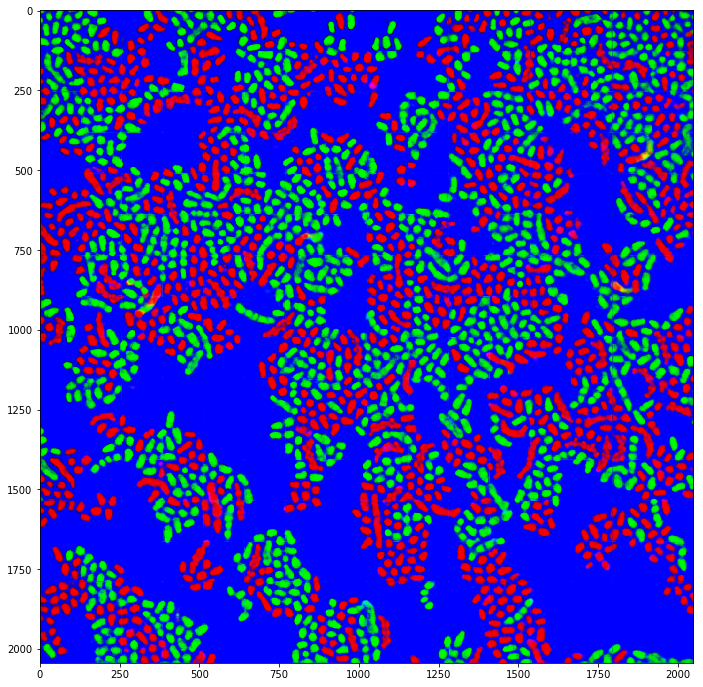

In [24]:
tr = r# > .8
#tr = tr.astype(np.int32)
#tr = 255*tr
print(tr.shape)
plt.figure(figsize=(12, 12))
plt.imshow(tr[:,:,0:3])



In [25]:
import tifffile
tifffile.imsave('/Users/cjw/Projects/sez/unetout0015-sm-zm.tif', np.moveaxis(r, -1, 0))